In [3]:
import pandas as pd 

data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv") 

data = data.drop(["id"], axis=1)

In [4]:
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


- **gender**: Giới tính của bệnh nhân, có thể là `"Male"`, `"Female"` hoặc `"Other"`.
- **age**: Tuổi của bệnh nhân (đơn vị: năm).
- **hypertension**: Tình trạng tăng huyết áp:
  - `0`: Không bị tăng huyết áp  
  - `1`: Có chẩn đoán tăng huyết áp
- **heart_disease**: Tình trạng bệnh tim:
  - `0`: Không mắc bệnh tim  
  - `1`: Có mắc bệnh tim
- **ever_married**: Tình trạng hôn nhân, `"No"` (chưa từng kết hôn) hoặc `"Yes"` (đã từng/kết hôn).
- **work_type**: Loại hình công việc:
  - `"children"`: Trẻ em (chưa đi làm)  
  - `"Govt_job"`: Nhân viên nhà nước  
  - `"Never_worked"`: Chưa từng đi làm  
  - `"Private"`: Làm việc trong khu vực tư nhân  
  - `"Self-employed"`: Tự kinh doanh
- **Residence_type**: Loại nơi cư trú, `"Rural"` (nông thôn) hoặc `"Urban"` (thành thị).
- **avg_glucose_level**: Mức đường huyết trung bình trong máu (đơn vị đo theo bộ dữ liệu gốc).
- **bmi**: Chỉ số khối cơ thể (Body Mass Index - BMI).
- **smoking_status**: Tình trạng hút thuốc:
  - `"formerly smoked"`: Đã từng hút thuốc nhưng đã bỏ  
  - `"never smoked"`: Chưa từng hút thuốc  
  - `"smokes"`: Đang hút thuốc  
  - `"Unknown"`: Không có thông tin về tình trạng hút thuốc
- **stroke**: Nhãn mục tiêu cho biết bệnh nhân có từng bị đột quỵ hay không:
  - `1`: Bệnh nhân đã từng bị đột quỵ  
  - `0`: Bệnh nhân chưa từng bị đột quỵ

In [5]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Có 5110 điểm dữ liệu, tồn tại missing value trong feature bmi
- Khoảng giá trị của các feature không đồng đều -> Có thể cần scale

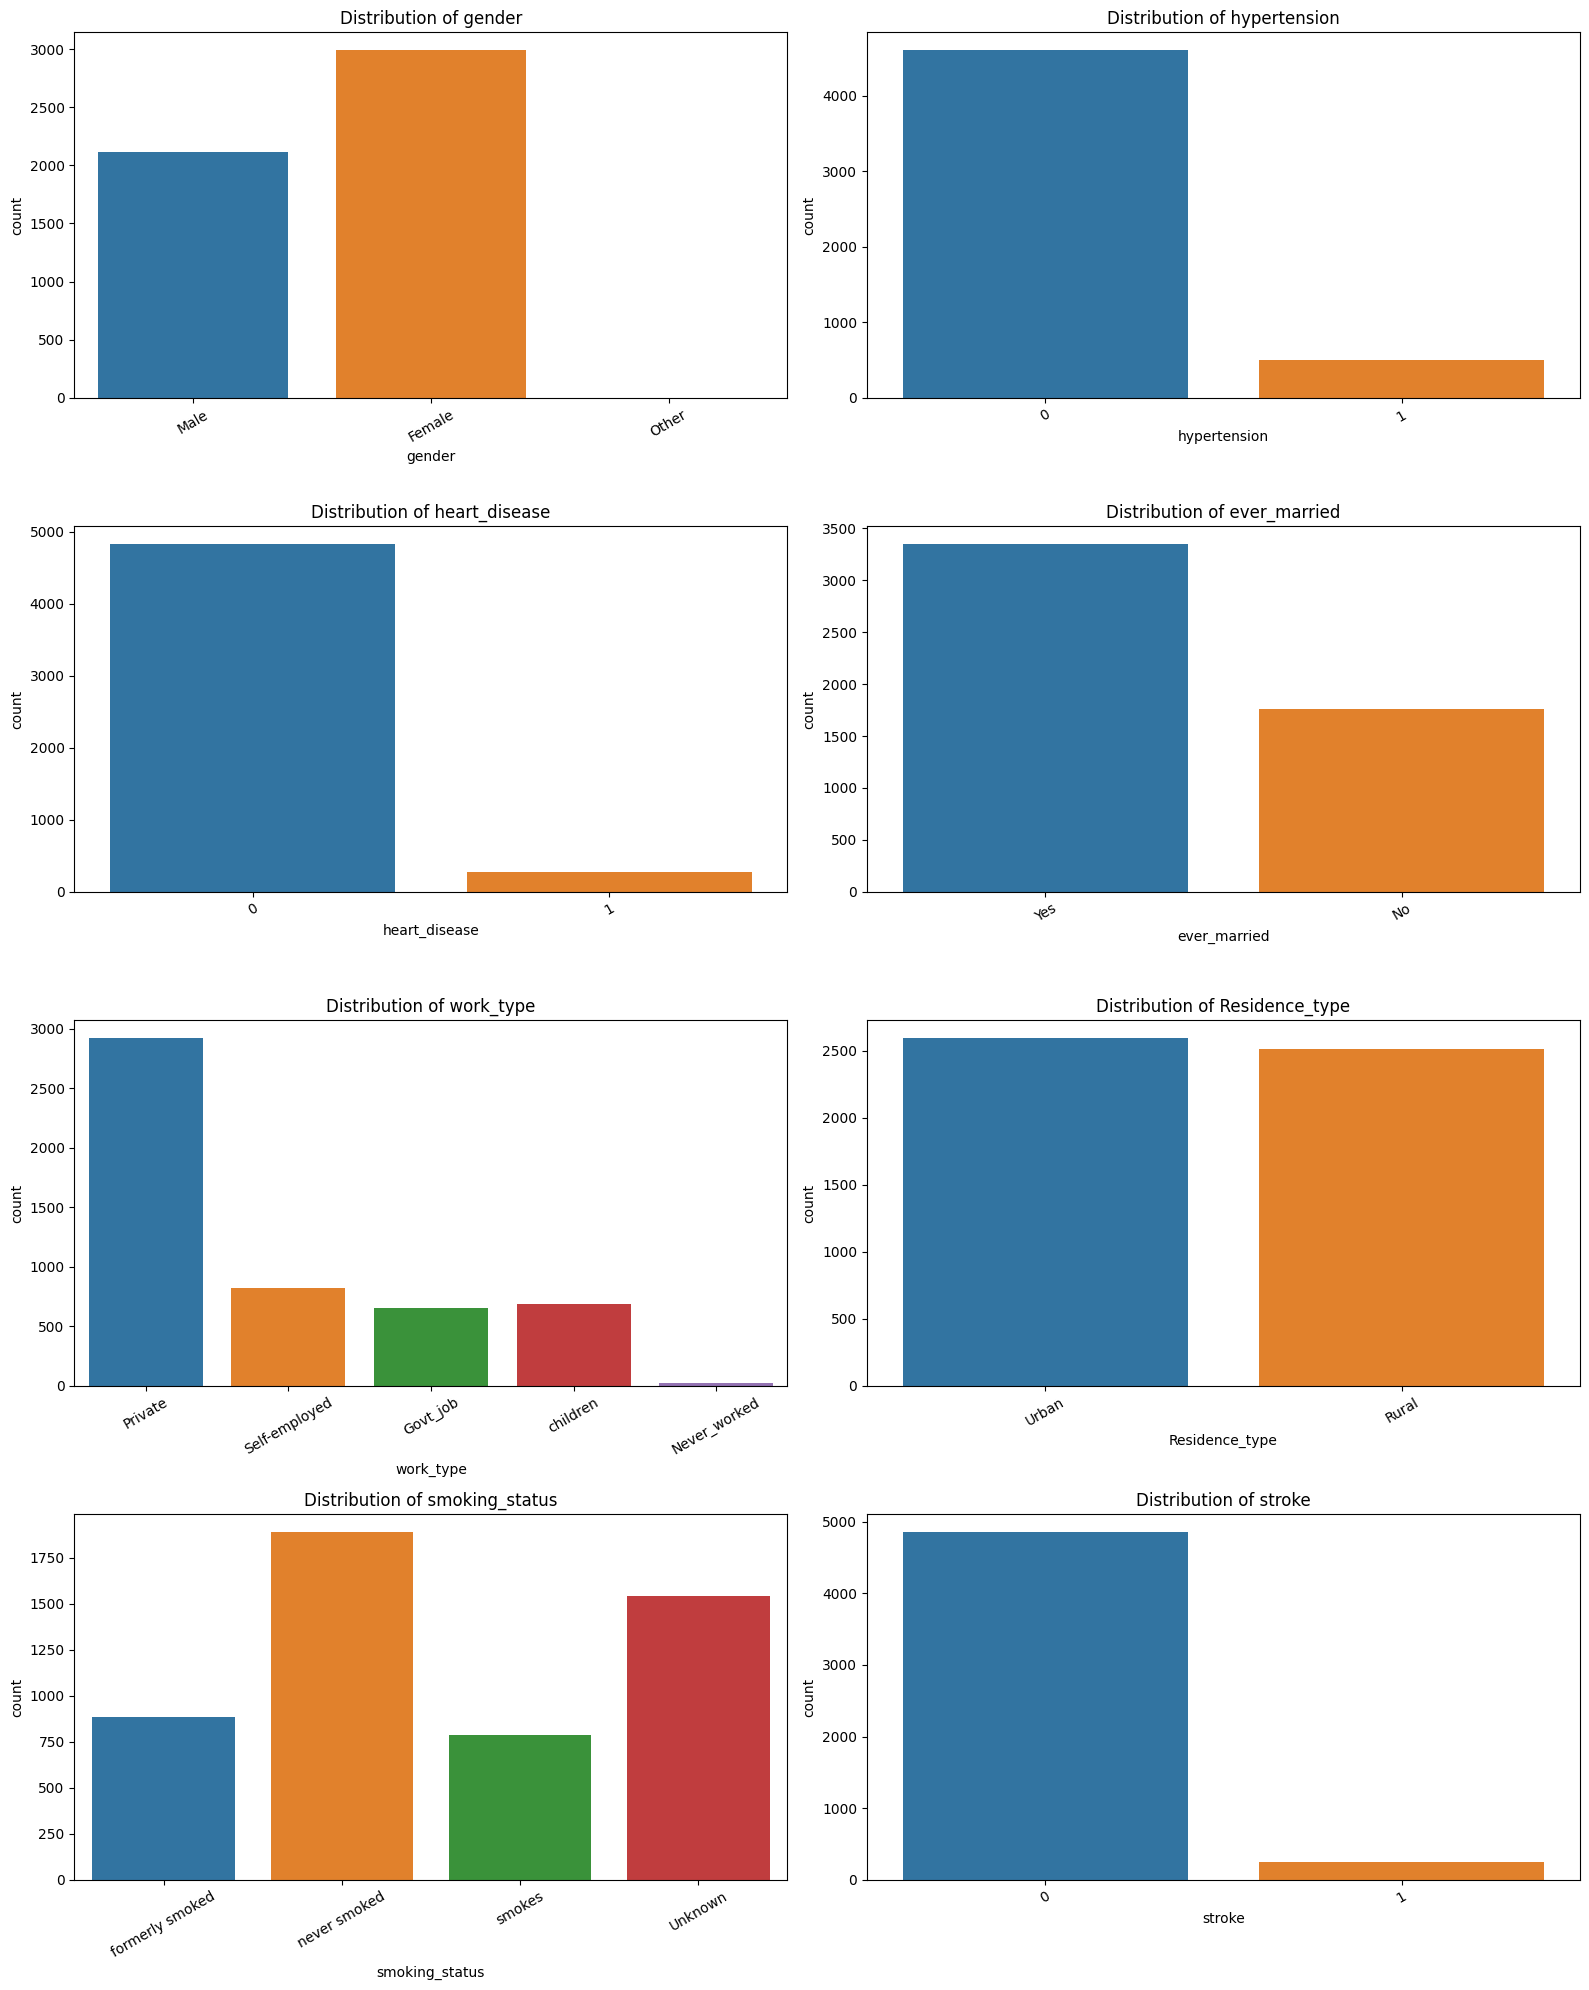

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'gender', 'hypertension', 'heart_disease',
    'ever_married', 'work_type',
    'Residence_type', 'smoking_status', 'stroke'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


- Nhìn vào biểu đồ stroke ta có thể thấy đây là bài toán imbalance -> Cần các kĩ thuật như class weight, SMOTE và sử dụng f1 score để đánh giá


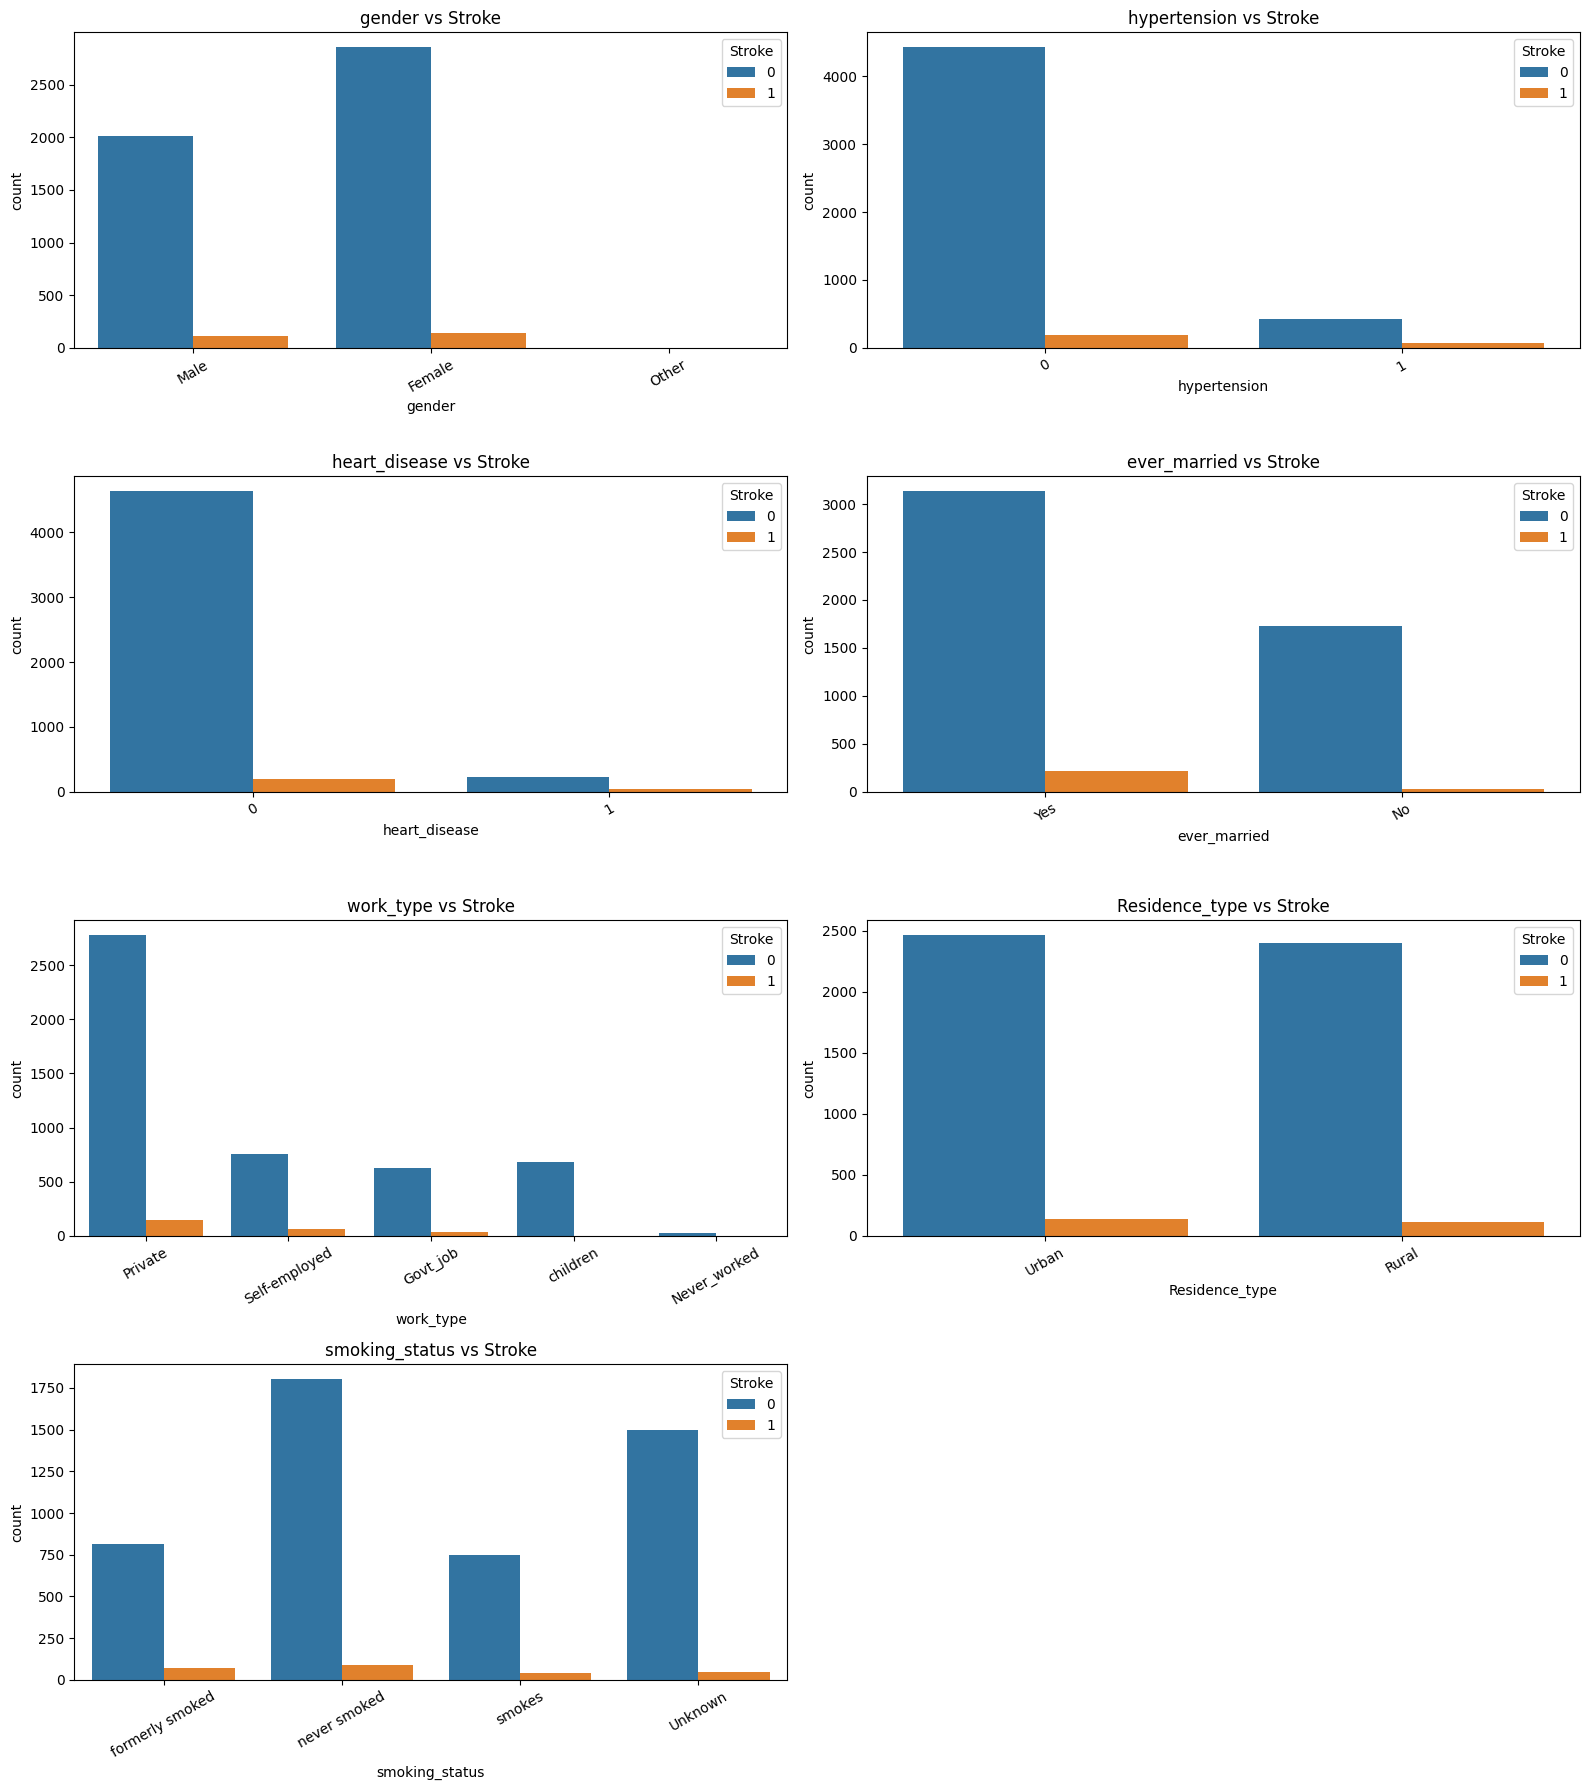

In [10]:
categorical_cols = [
    'gender', 'hypertension', 'heart_disease',
    'ever_married', 'work_type',
    'Residence_type', 'smoking_status'
]
plt.figure(figsize=(16, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(
        x=col,
        data=data,
        hue='stroke'
    )
    plt.title(f'{col} vs Stroke')
    plt.xticks(rotation=30)
    plt.legend(title='Stroke')

plt.tight_layout()
plt.show()


- Khó có thể kết luận được gì từ các biểu đồ này

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


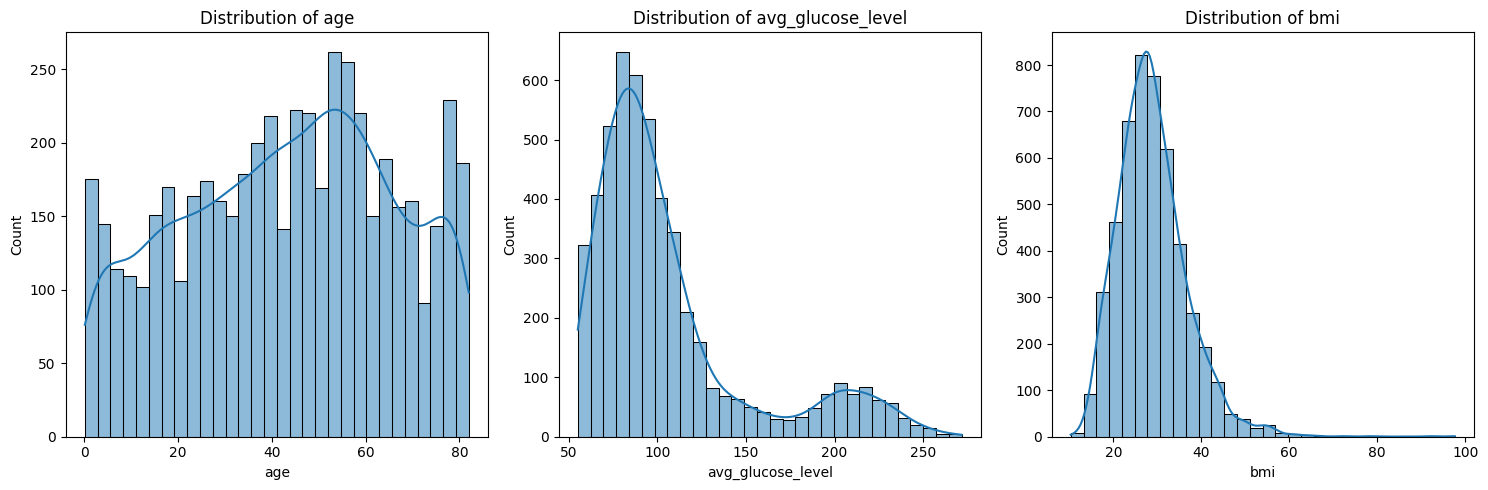

In [11]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


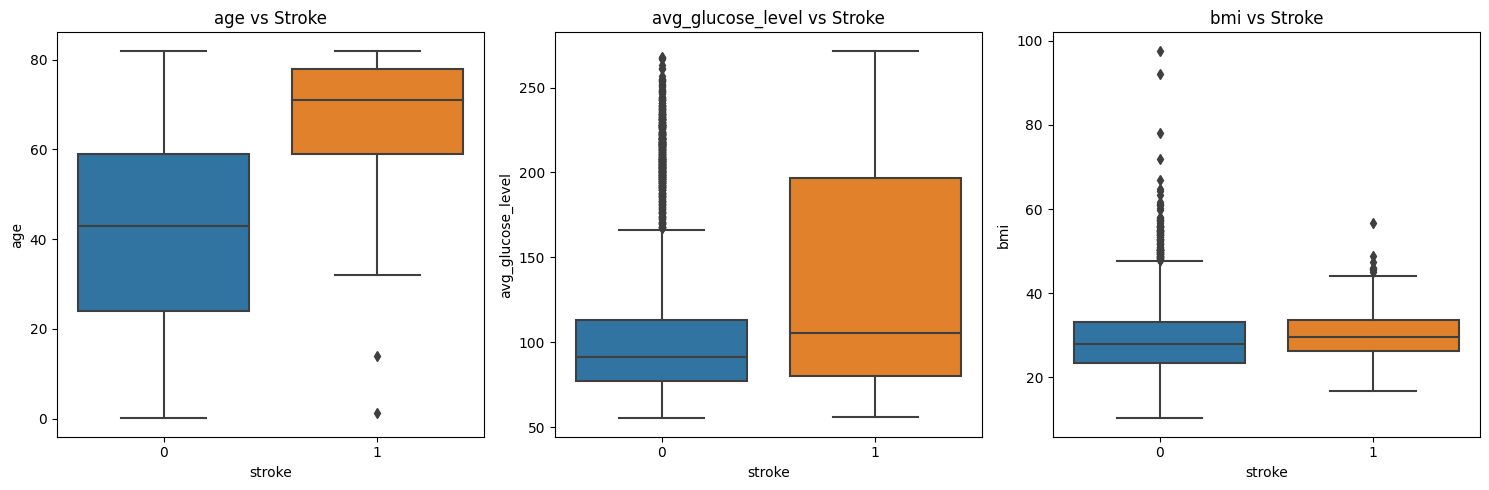

In [12]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=col, data=data)
    plt.title(f'{col} vs Stroke')

plt.tight_layout()
plt.show()


- Có thể thấy càng lớn tuổi thì tỉ lệ bị stroke càng cao
- Mức đường huyết trung bình trong máu càng cao thì dễ bị đột quỵ hơn nhưng không rõ ràng

In [13]:
missing_summary = pd.DataFrame({
    'missing_count': data.isnull().sum(),
    'missing_percent': data.isnull().mean() * 100
})

missing_summary = missing_summary.sort_values(
    by='missing_percent', ascending=False
)

missing_summary


,missing_count,missing_percent
bmi,201,3.933464
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


Chỉ có bmi là có missing values